# **Melampaui Produk Domestik Bruto**: Menjelajahi Indikator Multidimensi Kesejahteraan Ekonomi

## Pendahuluan

Dalam notebook Jupyter ini kita akan menjelajahi beberapa indikator selain dari Produk Domestik Bruto (PDB) untuk memperoleh pemahaman yang lebih mendalam tentang kesejahteraan ekonomi. Meskipun PDB telah lama menjadi ukuran utama kinerja ekonomi suatu negara, namun PDB tidak mampu menggambarkan aspek penting seperti ketimpangan ekonomi dan disparitas regional.

Untuk mengatasi keterbatasan tersebut, kita akan berfokus pada beberapa indikator multidimensi dalam analisis ini. Indikator-indikator utama yang akan kita jelajahi adalah:

1. Pendapatan Nasional Bruto (PNB): PNB memberikan ukuran yang lebih luas tentang aktivitas ekonomi suatu negara dengan memasukkan pendapatan yang dihasilkan oleh penduduk baik di dalam negeri maupun di luar negeri.
2. Rasio Gini: Rasio Gini adalah ukuran yang banyak digunakan untuk mengukur ketimpangan pendapatan. Dengan memeriksa distribusi pendapatan di seluruh populasi, rasio Gini membantu kita memahami tingkat ketimpangan ekonomi dalam suatu negara. Semakin tinggi rasio Gini, semakin besar ketimpangan pendapatan.
3. PNB per kapita: PNB per kapita adalah indikator yang mengukur pendapatan rata-rata yang diperoleh setiap individu dalam suatu negara. Indikator ini memberikan wawasan tentang standar hidup dan kesejahteraan ekonomi pada tingkat individu.
4. PDB Regional: Sementara PDB nasional memberikan ukuran keseluruhan tentang output ekonomi, menganalisis PDB regional memungkinkan kita mengungkap variasi dalam kinerja ekonomi di berbagai wilayah dalam suatu negara. Ini memberikan gambaran disparitas regional dan menyoroti daerah-daerah yang mungkin membutuhkan upaya pembangunan yang ditargetkan.
5. Rasio Gini Regional: Sama seperti rasio Gini nasional, rasio Gini regional berfokus pada ketimpangan pendapatan di tingkat regional. Dengan memeriksa disparitas di dalam wilayah, kita dapat mengidentifikasi daerah-daerah yang memerlukan perhatian dalam hal pembangunan ekonomi yang adil.

Melalui notebook ini, tujuan kita adalah untuk menunjukkan signifikansi dari indikator-indikator multidimensi ini dalam memperoleh pemahaman yang lebih komprehensif tentang kesejahteraan ekonomi suatu negara. Dengan melampaui PDB dan memeriksa faktor-faktor seperti ketimpangan ekonomi dan disparitas regional, kita dapat mengembangkan kebijakan dan strategi yang lebih terinformasi untuk mendorong pertumbuhan ekonomi inklusif dan berkelanjutan.

## Persiapan Data

### Import Library dan Formating Default Data

In [1]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:,.2f}'.format)

### Import Dataset

#### Produk Domestik Bruto (PDB) Indonesia
Sumber: https://www.bps.go.id

In [71]:
pdb = pd.read_csv('PDB.csv',sep=';')
pdb.drop(columns=pdb[['nama_variabel','nama_variabel_turunan','nama_turunan_tahun','nama_item_vertical_variabel']],inplace=True)
pdb.rename(columns={'nama_tahun':'tahun','data_content':'pdb_in_bio_rupiah'},inplace=True)
pdb = pdb.sort_values('tahun').reset_index(drop=True)
pdb

,tahun,pdb_in_bio_rupiah
0,2018,"14,838,756.00"
1,2019,"15,832,657.20"
2,2020,"15,443,353.20"
3,2021,"16,976,690.80"
4,2022,"19,588,445.60"


#### Produk Nasional Bruto (PNB) Indonesia
Sumber https://www.bi.go.id

In [72]:
pnb = pd.read_csv('pdb_pnb_BI.csv',sep=';')
pnb.drop(columns='Produk Domestik Bruto',inplace=True)
pnb['Produk Nasional Bruto'] = pnb['Produk Nasional Bruto'].str.replace('.','').astype(float)
pnb.rename(columns={'Produk Nasional Bruto':'pnb_in_bio_rupiah'},inplace=True)
pnb

,tahun,pnb_in_bio_rupiah
0,2018,"14,396,572.00"
1,2019,"15,351,336.00"
2,2020,"15,019,306.00"
3,2021,"16,515,794.00"
4,2022,"19,049,896.00"


#### Populasi Indonesia
Sumber: https://www.bps.go.id

In [73]:
populasi = pd.read_csv('populacy.csv',sep=';')
populasi.drop(columns=populasi[['nama_variabel','nama_variabel_turunan','nama_turunan_tahun','nama_item_vertical_variabel']],inplace=True)
populasi.rename(columns={'nama_tahun':'tahun','data_content':'populasi_in_mio'},inplace=True)
populasi = populasi.sort_values('tahun').reset_index(drop=True)
populasi['populasi_in_mio'] = round(populasi['populasi_in_mio']/1000,2)
populasi

,tahun,populasi_in_mio
0,2018,264.16
1,2019,266.91
2,2020,270.20
3,2021,272.68
4,2022,275.77


#### Rasio Gini Indonesia
https://www.bps.go.id

In [74]:
giniRatio = pd.read_csv('giniratioindonesia.csv',sep=';')
giniRatio.drop(columns=giniRatio[['nama_variabel','nama_variabel_turunan','nama_turunan_tahun','nama_item_vertical_variabel']],inplace=True)
giniRatio.rename(columns={'nama_tahun':'tahun','data_content':'gini_ratio'},inplace=True)
populasi = populasi.sort_values('tahun').reset_index(drop=True)
giniRatio

,tahun,gini_ratio
0,2022,0.38
1,2021,0.38
2,2020,0.39
3,2019,0.38
4,2018,0.38


#### Penggabungan Kolom Besaran: PDB, PNB, Populasi, dan Rasio Gini Indonesia

In [75]:
merged_df_indonesia = pd.merge(pdb,pnb,on='tahun',how='inner')
merged_df_indonesia = pd.merge(merged_df_indonesia,populasi,on='tahun',how='inner')
merged_df_indonesia = pd.merge(merged_df_indonesia,giniRatio,on='tahun',how='inner')
merged_df_indonesia['pnb_per_capita_in_mio_rupiah'] = merged_df_indonesia['pnb_in_bio_rupiah'] / merged_df_indonesia['populasi_in_mio']
merged_df_indonesia

,tahun,pdb_in_bio_rupiah,pnb_in_bio_rupiah,populasi_in_mio,gini_ratio,pnb_per_capita_in_mio_rupiah
0,2018,"14,838,756.00","14,396,572.00",264.16,0.38,"54,499.44"
1,2019,"15,832,657.20","15,351,336.00",266.91,0.38,"57,515.03"
2,2020,"15,443,353.20","15,019,306.00",270.20,0.39,"55,585.88"
3,2021,"16,976,690.80","16,515,794.00",272.68,0.38,"60,568.41"
4,2022,"19,588,445.60","19,049,896.00",275.77,0.38,"69,078.93"


#### PDB Regional (Provinsi) Indonesia

In [76]:
pdb_regional = pd.read_csv('PDBRegional.csv',sep=';')
pdb_regional.drop(columns=pdb_regional[['nama_variabel','nama_variabel_turunan','nama_turunan_tahun']],inplace=True)
pdb_regional.rename(columns={'nama_tahun':'tahun','data_content':'pdb_region_in_bio','nama_item_vertical_variabel': 'region'},inplace=True)
pdb_regional = pdb_regional[pdb_regional['tahun']==2022].reset_index(drop=True)
pdb_regional.head()

,tahun,pdb_region_in_bio,region
0,2022,"211,750.02",ACEH
1,2022,"955,193.09",SUMATERA UTARA
2,2022,"285,378.64",SUMATERA BARAT
3,2022,"991,589.59",RIAU
4,2022,"276,316.37",JAMBI


#### Rasio Gini Regional (Provinsi) Indonesia

In [77]:
gini_regional = pd.read_csv('GiniRatioRegional.csv',sep=';')
gini_regional.drop(columns=gini_regional[['nama_variabel','nama_variabel_turunan','nama_turunan_tahun']],inplace=True)
gini_regional.rename(columns={'nama_tahun':'tahun','data_content':'gini_ratio_region','nama_item_vertical_variabel': 'region'},inplace=True)
gini_regional = gini_regional[gini_regional['tahun']==2022].reset_index(drop=True)
gini_regional.drop(index=34)
gini_regional.head()

,tahun,gini_ratio_region,region
0,2022,0.29,ACEH
1,2022,0.33,SUMATERA UTARA
2,2022,0.29,SUMATERA BARAT
3,2022,0.32,RIAU
4,2022,0.34,JAMBI


#### Indonesia Geo JSON
sumber: https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia.geojson

In [78]:
# Dgunakan jika ingin menggunakan data set online pada github
# Indonesia_geoJSON = f"https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia.geojson"

# Dgunakan jika data set geo JSON sudah diunduh pada local repository
with open('geoJSONIndonesia.geojson', 'r') as f:
    geojson_data = f.read()

#### ID Provinsi
sumber: https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia.geojson

ID didapatkan dari melihat field id_1 dan region didpatkan dari field 'state' pada file geo JSON.

In [79]:
id_region = pd.read_csv('id_1.csv',sep=';')
id_region['region'] = id_region['region'].str.upper().reset_index(drop=True)

#### Penggabungan Kolom Region: PDB, Rasio Gini, ID Provinsi (Provinsi) Indonesia

In [80]:
merged_df_regional = pd.merge(pdb_regional,gini_regional[['gini_ratio_region','region']],on='region',how='inner')
merged_df_regional = pd.merge(merged_df_regional,id_region,on='region',how='inner')
merged_df_regional = merged_df_regional.sort_values('id_1').reset_index(drop=True)
merged_df_regional.head()

,tahun,pdb_region_in_bio,region,gini_ratio_region,id_1
0,2022,"211,750.02",ACEH,0.29,1
1,2022,"245,233.24",BALI,0.36,2
2,2022,"95,285.43",KEP. BANGKA BELITUNG,0.26,3
3,2022,"747,250.29",BANTEN,0.38,4
4,2022,"90,111.95",BENGKULU,0.32,5


## Analisis dan Visualisasi Data

In [81]:
merged_df_indonesia

,tahun,pdb_in_bio_rupiah,pnb_in_bio_rupiah,populasi_in_mio,gini_ratio,pnb_per_capita_in_mio_rupiah
0,2018,"14,838,756.00","14,396,572.00",264.16,0.38,"54,499.44"
1,2019,"15,832,657.20","15,351,336.00",266.91,0.38,"57,515.03"
2,2020,"15,443,353.20","15,019,306.00",270.20,0.39,"55,585.88"
3,2021,"16,976,690.80","16,515,794.00",272.68,0.38,"60,568.41"
4,2022,"19,588,445.60","19,049,896.00",275.77,0.38,"69,078.93"


#### PDB dan PNB Indonesia

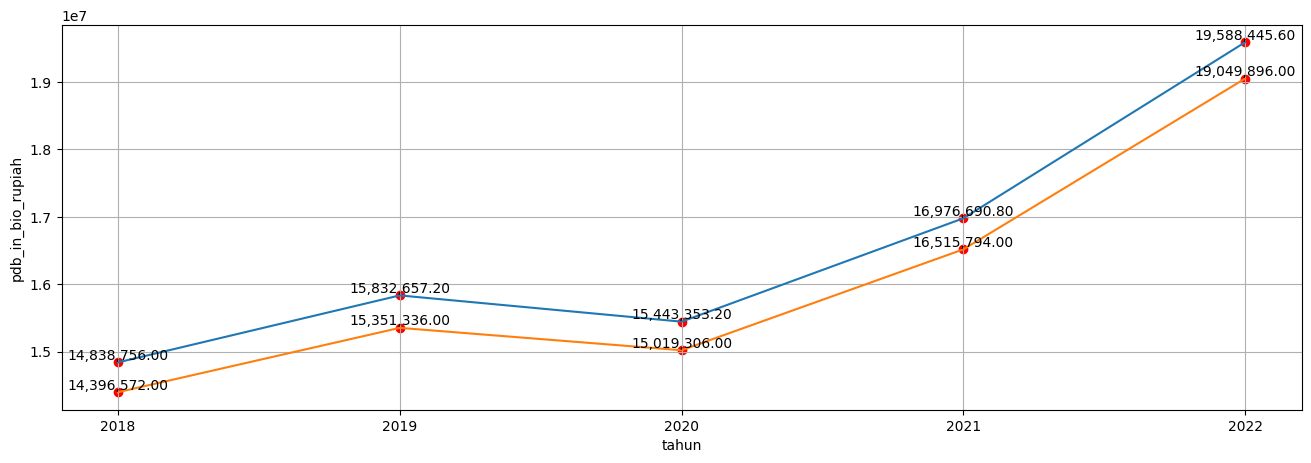

In [82]:
plt.figure(figsize=(16,5))
sns.lineplot(
    data = merged_df_indonesia,
    x = 'tahun',
    y = 'pdb_in_bio_rupiah'
)

plt.scatter(
    merged_df_indonesia['tahun'],
    merged_df_indonesia['pdb_in_bio_rupiah'],
    c='red'
)

for x, y, value in zip(merged_df_indonesia['tahun'], merged_df_indonesia['pdb_in_bio_rupiah'], merged_df_indonesia['pdb_in_bio_rupiah']):
    formatted_value = "{:,.2f}".format(value)
    plt.text(x, y, formatted_value, ha='center', va='bottom')
    
sns.lineplot(
    data = merged_df_indonesia,
    x = 'tahun',
    y = 'pnb_in_bio_rupiah'
)

plt.scatter(
    merged_df_indonesia['tahun'],
    merged_df_indonesia['pnb_in_bio_rupiah'],
    c='red'
)

for x, y, value in zip(merged_df_indonesia['tahun'], merged_df_indonesia['pnb_in_bio_rupiah'], merged_df_indonesia['pnb_in_bio_rupiah']):
    formatted_value = "{:,.2f}".format(value)
    plt.text(x, y, formatted_value, ha='center', va='bottom')

plt.xticks(merged_df_indonesia['tahun'].astype(int))

plt.grid()

plt.show()

In [83]:
PDB_PNB_Indonesia = merged_df_indonesia[['tahun','pdb_in_bio_rupiah','pnb_in_bio_rupiah']]
PDB_PNB_Indonesia['selisih'] =  merged_df_indonesia['pdb_in_bio_rupiah'] - merged_df_indonesia['pnb_in_bio_rupiah']
display(PDB_PNB_Indonesia)
PDB_PNB_Indonesia['selisih'].mean()

,tahun,pdb_in_bio_rupiah,pnb_in_bio_rupiah,selisih
0,2018,"14,838,756.00","14,396,572.00","442,184.00"
1,2019,"15,832,657.20","15,351,336.00","481,321.20"
2,2020,"15,443,353.20","15,019,306.00","424,047.20"
3,2021,"16,976,690.80","16,515,794.00","460,896.80"
4,2022,"19,588,445.60","19,049,896.00","538,549.60"


469399.7600000001

Insight:
- Dari grafik di atas dapat disimpulkan PDB dan PNB Indonesia dalam 5 tahun terakhir memiliki kecendrungan peningkatan nilai dalam periode terkait.
- Selisih PDB dan PNB Indonesia dalam 5 tahun terakhir sebesar Rp 469,399.76 Miliar.

#### PNB per Kapita Indonesia

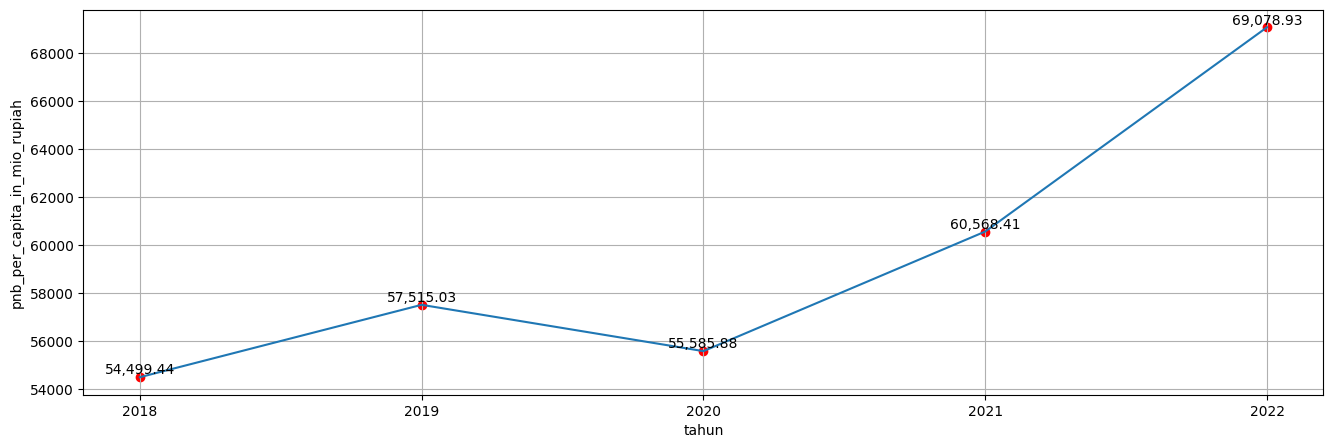

In [84]:
plt.figure(figsize=(16,5))
sns.lineplot(
    data = merged_df_indonesia,
    x = 'tahun',
    y = 'pnb_per_capita_in_mio_rupiah'
)

plt.scatter(
    merged_df_indonesia['tahun'],
    merged_df_indonesia['pnb_per_capita_in_mio_rupiah'],
    c='red'
)

for x, y, value in zip(merged_df_indonesia['tahun'], merged_df_indonesia['pnb_per_capita_in_mio_rupiah'], merged_df_indonesia['pnb_per_capita_in_mio_rupiah']):
    formatted_value = "{:,.2f}".format(value)
    plt.text(x, y, formatted_value, ha='center', va='bottom')

plt.xticks(merged_df_indonesia['tahun'].astype(int))

plt.grid()

plt.show()

In [85]:
gnpPerCapita = merged_df_indonesia[['tahun','pnb_per_capita_in_mio_rupiah']]
gnpPerCapita['pnb_per_capita_per_month_in_mio_rupiah'] = merged_df_indonesia['pnb_per_capita_in_mio_rupiah']/12
gnpPerCapita

,tahun,pnb_per_capita_in_mio_rupiah,pnb_per_capita_per_month_in_mio_rupiah
0,2018,"54,499.44","4,541.62"
1,2019,"57,515.03","4,792.92"
2,2020,"55,585.88","4,632.16"
3,2021,"60,568.41","5,047.37"
4,2022,"69,078.93","5,756.58"


Insight:
- Dari grafik di atas dapat disimpulkan PNB per Kapita Indonesia dalam 5 tahun terakhir memiliki kecendrungan peningkatan nilai dalam periode terkait.
- PNB pada tahun 2022 memiliki nilai Rp 69,078.93 juta. Dalam kata lain rata-rata penduduk meenghasilkan PDB sebesar Rp 5,756.58 juta per bulannya.

#### Rasio Gini Indonesia

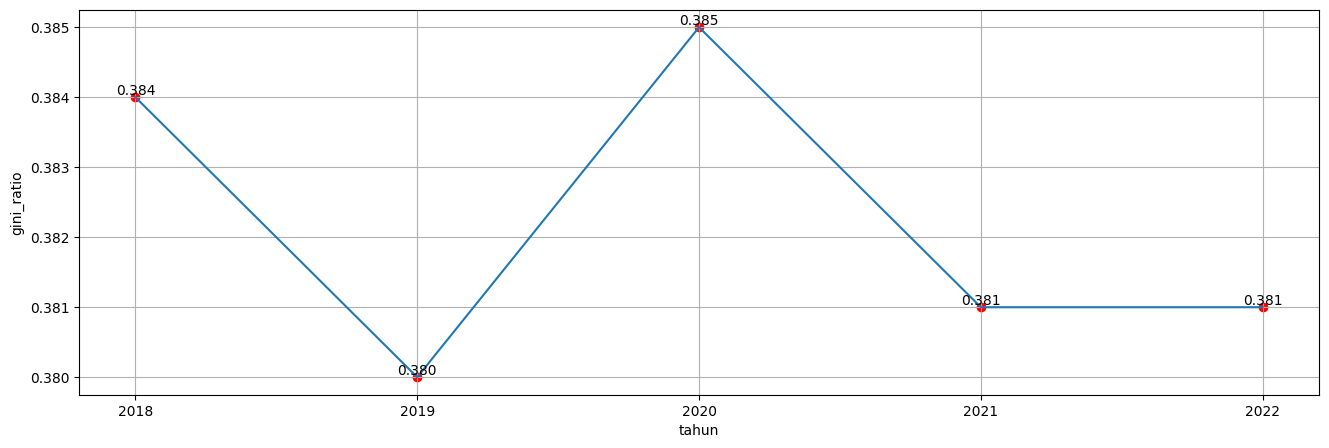

In [86]:
plt.figure(figsize=(16,5))
sns.lineplot(
    data = merged_df_indonesia,
    x = 'tahun',
    y = 'gini_ratio'
)

plt.scatter(
    merged_df_indonesia['tahun'],
    merged_df_indonesia['gini_ratio'],
    c='red'
)

for x, y, value in zip(merged_df_indonesia['tahun'], merged_df_indonesia['gini_ratio'], merged_df_indonesia['gini_ratio']):
    formatted_value = "{:,.3f}".format(value)
    plt.text(x, y, formatted_value, ha='center', va='bottom')

plt.xticks(merged_df_indonesia['tahun'].astype(int))

plt.grid()

plt.show()

Insight:
- Dari grafik di atas dapat disimpulkan rasio giniIndonesia dalam 5 tahun terakhir memiliki kecendrungan stabil di angka 0.38.
- Rasio Gini bernilai 0.38 dapat diasumsikan ketimpangan ekonomi yang ada di Indonesia secara keseluruhan ada di tingkat Moderate Inequality.

Setelah kita melihat kondisi perekonomian dari parameter secara agregat. Mari kita lihat lebih dalam menggunakan pendekatan per regional (Provinsi) pada tahun 2022.

In [87]:
merged_df_regional.head()

,tahun,pdb_region_in_bio,region,gini_ratio_region,id_1
0,2022,"211,750.02",ACEH,0.29,1
1,2022,"245,233.24",BALI,0.36,2
2,2022,"95,285.43",KEP. BANGKA BELITUNG,0.26,3
3,2022,"747,250.29",BANTEN,0.38,4
4,2022,"90,111.95",BENGKULU,0.32,5


#### PDB Regional (Provinsi) Indonesia

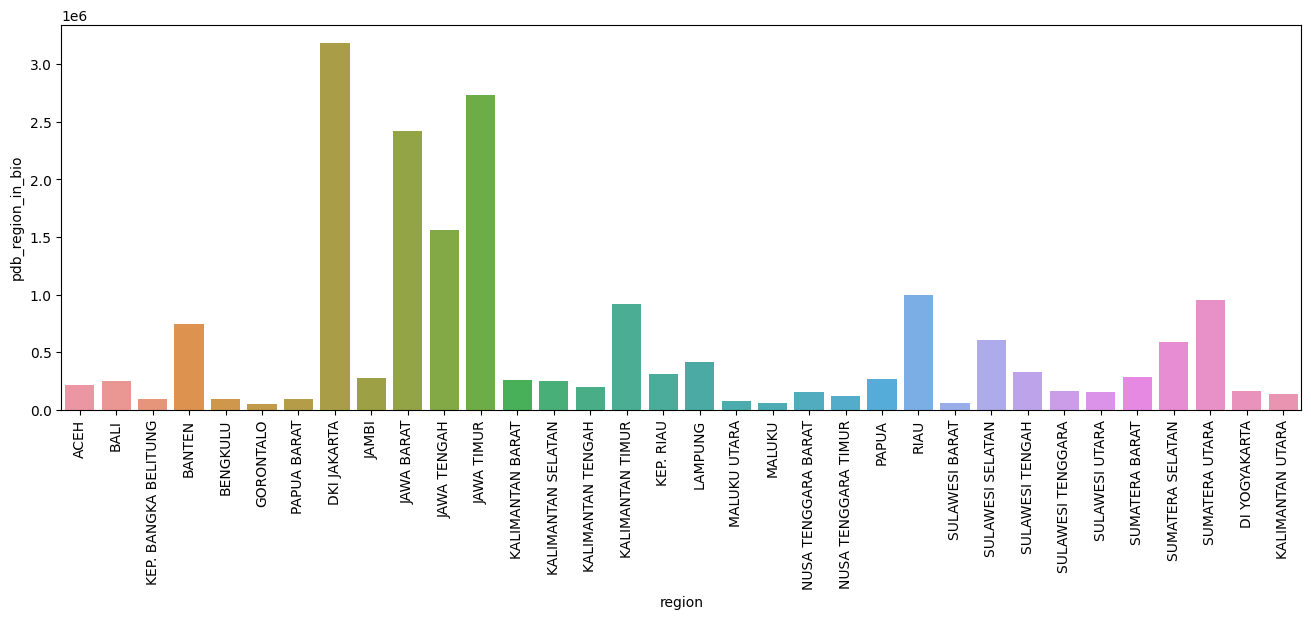

In [88]:
plt.figure(figsize=(16,5))

sns.barplot(
    data = merged_df_regional,
    x = 'region',
    y = 'pdb_region_in_bio'
    
)

plt.xticks(rotation=90)

plt.show()

In [89]:
m = folium.Map(location=[-2.4833826, 117.8902853], zoom_start=5)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=merged_df_regional,
    columns=["id_1", "pdb_region_in_bio"],
    key_on="feature.properties.id_1",
    fill_color="RdYlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="PDB_Regional",
).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m

insight:
- Dari 2 grafik di atas dapat disimpulkan PDB Indonesia tidak merata, hal ini dapat dilihat melalui pemusatan GDP pada provnsi-provinsi tertentu seperti  DKI Jakarta, Jawa Barat, Jawa Tengah, dan Jawa Timur.
- Dari grafik pemetaan dapat disimpulkan pemusatan PDB terjadi pada pulau Jawa.
- PDB tercermin tinggi hanya pada 4 Provinsi di seluruh Indonesia (11.7%). Jumlah Provinsi masih menggunakan 34 Provinsi.

#### Rasio Gini Regional (Provinsi) Indonesia

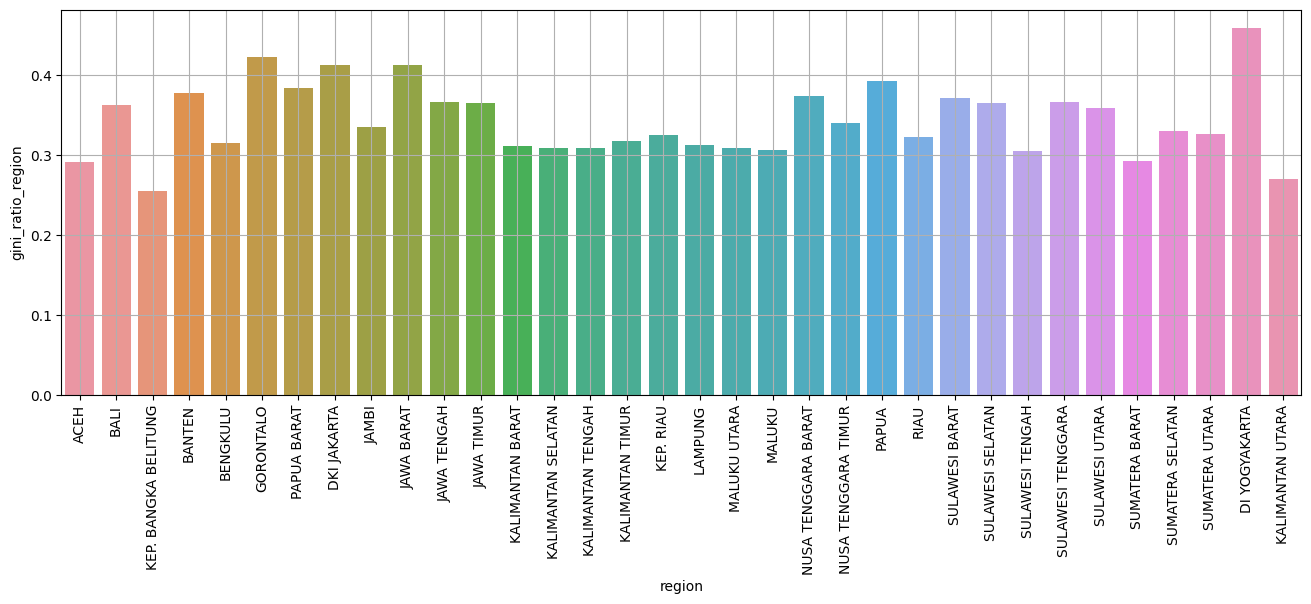

In [90]:
plt.figure(figsize=(16,5))

sns.barplot(
    data = merged_df_regional,
    x = 'region',
    y = 'gini_ratio_region'
    
)

plt.grid()

plt.xticks(rotation=90)

plt.show()

In [91]:

m = folium.Map(location=[7.1510, 115.0920], zoom_start=4)


folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=merged_df_regional,
    columns=["id_1", "gini_ratio_region"],
    key_on="feature.properties.id_1",
    fill_color="RdYlGn_r",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Indeks Gini",
    threshold_scale=[0,0.2,0.4,0.6,0.8,1]

).add_to(m)

folium.LayerControl().add_to(m)
m

In [92]:
merged_df_regional[merged_df_regional['gini_ratio_region']>=0.381].sort_values('gini_ratio_region',ascending=False)

,tahun,pdb_region_in_bio,region,gini_ratio_region,id_1
32,2022,"165,690.21",DI YOGYAKARTA,0.46,34
5,2022,"47,574.43",GORONTALO,0.42,6
7,2022,"3,186,469.91",DKI JAKARTA,0.41,8
9,2022,"2,422,782.32",JAWA BARAT,0.41,10
22,2022,"262,515.82",PAPUA,0.39,24
6,2022,"91,291.75",PAPUA BARAT,0.38,7


insight:
- Dari grafik di atas didapatkan bahwa Gini Ratio Indonesia tersebar di antara 0.26 - 0.46.
- Pada tahun 2022 terdapat 6 provinsi yang memiliki nilai Rasio Gini di atas 0.381 (Rasio Gini Indonesia) yaitu DI Yogyakarta, Gorontalo, DKI Jakarta, Jawa Barat, Papua, dan Papua Barat.

## Penutup
Dalam Jupyter notebook ini, kita telah menjelajahi berbagai indikator multidimensi selain konsep tradisional Produk Domestik Bruto (PDB) untuk memperoleh pemahaman yang lebih komprehensif tentang kesejahteraan ekonomi. Dari hasil analisis dan visualisasi data, kita dapat melihat gambaran kesejahteraan ekonomi di Indonesia berdasarkan indikator-indikator seperti Pendapatan Nasional Bruto (PNB), Rasio Gini, PNB per kapita, PDB Regional, dan Rasio Gini Regional.

Analisis ini dapat dilanjutkan dengan membandingkan kondisi kesejahteraan ekonomi Indonesia dengan negara-negara lain sebagai benchmark untuk mengetahui posisinya. Dengan demikian, kita dapat mengembangkan kebijakan dan strategi yang lebih terinformasi untuk mendorong pertumbuhan ekonomi inklusif dan berkelanjutan. 

Akhir kata kami ucapkan terima kasih kepada Badan Pusat Statistik dan Bank Indonesia atas transparansi mereka dalam menyediakan data-data yang diperlukan untuk masyarakat Indonesia.